In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
p7wine= pd.read_csv("WineQT.csv")

In [340]:
p7wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [341]:
p7wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [342]:
p7wine.rename(columns={
    "fixed acidity": "sabit_asitlik",
    "volatile acidity": "uçucu_asitlik",
    "citric acid": "sitrik_asit",
    "residual sugar": "artık_şeker",
    "chlorides": "klorür",
    "free sulfur dioxide": "serbest_sülfit",
    "total sulfur dioxide": "toplam_sülfit",
    "density": "yoğunluk",
    "pH": "ph",
    "sulphates": "sülfat",
    "alcohol": "alkol",
    "quality": "kalite",
    "Id": "id"
}, inplace=True)

In [343]:
p7wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sabit_asitlik   1143 non-null   float64
 1   uçucu_asitlik   1143 non-null   float64
 2   sitrik_asit     1143 non-null   float64
 3   artık_şeker     1143 non-null   float64
 4   klorür          1143 non-null   float64
 5   serbest_sülfit  1143 non-null   float64
 6   toplam_sülfit   1143 non-null   float64
 7   yoğunluk        1143 non-null   float64
 8   ph              1143 non-null   float64
 9   sülfat          1143 non-null   float64
 10  alkol           1143 non-null   float64
 11  kalite          1143 non-null   int64  
 12  id              1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [344]:
p7wine.isnull().sum()

sabit_asitlik     0
uçucu_asitlik     0
sitrik_asit       0
artık_şeker       0
klorür            0
serbest_sülfit    0
toplam_sülfit     0
yoğunluk          0
ph                0
sülfat            0
alkol             0
kalite            0
id                0
dtype: int64

In [345]:
p7wine.duplicated().sum()

np.int64(0)

In [346]:
p7wine.drop("id", axis=1, inplace=True)

id sütununu sildik

In [347]:
p7wine.duplicated().sum()

np.int64(125)

In [348]:
p7wine.drop_duplicates(inplace=True)

Yinelenen satırları sildik.

In [349]:
def aykiri_deger_tespiti_iqr(veri, sutun_adi):
    Q1 = veri[sutun_adi].quantile(0.25)
    Q3 = veri[sutun_adi].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    aykirilar = veri[(veri[sutun_adi] < alt_sinir) | (veri[sutun_adi] > ust_sinir)]

    print(f"🔎 '{sutun_adi}' sütununda aykırı değer sayısı: {aykirilar.shape[0]}")
    return aykirilar

Aykırı değer tespiti yapan fonksiyon

In [350]:
aykiri_deger_tespiti_iqr(p7wine, "uçucu_asitlik")

🔎 'uçucu_asitlik' sütununda aykırı değer sayısı: 10


,sabit_asitlik,uçucu_asitlik,sitrik_asit,artık_şeker,klorür,serbest_sülfit,toplam_sülfit,yoğunluk,ph,sülfat,alkol,kalite
83,7.3,1.070,0.09,1.7,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
87,8.2,1.330,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
88,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
92,7.9,1.040,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
142,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
396,5.0,1.040,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
502,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
931,8.0,1.180,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5
1044,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4


In [351]:
def tum_sayisal_sutunlara_yumusat(veri):
    sayisal_sutunlar = veri.select_dtypes(include=['float64', 'int64']).columns

    for sutun in sayisal_sutunlar:
        Q1 = veri[sutun].quantile(0.25)
        Q3 = veri[sutun].quantile(0.75)
        IQR = Q3 - Q1
        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR
        veri[sutun] = veri[sutun].apply(lambda x: alt_sinir if x < alt_sinir else (ust_sinir if x > ust_sinir else x))
        print(f" '{sutun}' yumuşatıldı | [{alt_sinir:.2f}, {ust_sinir:.2f}] aralığına çekildi.")
    
    return veri

Aykırı değeri silmek yerine yumuşatmayı seçtim. Veri seti küçük bu yüzden veriler değerli.

FEATURE ENGINEERING

In [352]:
p7wine["so2_orani"] = p7wine["serbest_sülfit"] / (p7wine["toplam_sülfit"] + 1e-6) #Şarapta koruma sağlayan aktif kükürtün toplam kükürt içeriğine oranı. 
p7wine["asitlik_alkol_carpimi"] = p7wine["uçucu_asitlik"] * p7wine["alkol"] #Yüksek uçucu asitlik şarabı bozabilir; alkol bunu baskılayabilir
p7wine["asitlik_farki"] = p7wine["sabit_asitlik"] - p7wine["uçucu_asitlik"] #Kalıcı asit ile uçucu asit arasındaki fark, şarabın gövde ve kalitesini etkileyen yapısal göstergedir.

Şarap uzmanı olduğumdan so2 oranı gibi özel metrikleri oluşturdum(!)

In [353]:
p7wine["artık_şeker_log"] = np.log1p(p7wine["artık_şeker"])
p7wine["uçucu_asitlik_karekök"] = np.sqrt(p7wine["uçucu_asitlik"])
p7wine["alkol_zscore"] = (p7wine["alkol"] - p7wine["alkol"].mean()) / p7wine["alkol"].std()

Log, karekök ve z-score dönüşümleriyle uç değerlerin etkisi azaltıldı ve değişkenler daha dengeli hale getirildi.

In [354]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
sayisal_veriler = p7wine.select_dtypes(include=["float64", "int64"])
poly_veri = poly.fit_transform(sayisal_veriler)
poly_feature_names = poly.get_feature_names_out(sayisal_veriler.columns)
df_poly = pd.DataFrame(poly_veri, columns=poly_feature_names)
p7wine = pd.concat([p7wine, df_poly.iloc[:, len(sayisal_veriler.columns):len(sayisal_veriler.columns)+5]], axis=1)

PolynomialFeatures ile 2. dereceden 5 yeni etkileşimli özellik eklendi. Bu özellikler doğrusal olmayan ilişkileri yakalamak için önemlidir.

In [355]:
p7wine.head()

,sabit_asitlik,uçucu_asitlik,sitrik_asit,artık_şeker,klorür,serbest_sülfit,toplam_sülfit,yoğunluk,ph,sülfat,...,asitlik_alkol_carpimi,asitlik_farki,artık_şeker_log,uçucu_asitlik_karekök,alkol_zscore,sabit_asitlik^2,sabit_asitlik uçucu_asitlik,sabit_asitlik sitrik_asit,sabit_asitlik artık_şeker,sabit_asitlik klorür
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,6.580,6.70,1.064711,0.836660,-0.961090,54.76,5.180,0.000,14.06,0.5624
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,8.624,6.92,1.280934,0.938083,-0.595815,60.84,6.864,0.000,20.28,0.7644
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,7.448,7.04,1.193922,0.871780,-0.595815,60.84,5.928,0.312,17.94,0.7176
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,2.744,10.92,1.064711,0.529150,-0.595815,125.44,3.136,6.272,21.28,0.8400
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,...,6.204,6.74,1.029619,0.812404,-0.961090,62.41,4.740,0.474,12.64,0.5451


In [356]:
p7wine.columns

Index(['sabit_asitlik', 'uçucu_asitlik', 'sitrik_asit', 'artık_şeker',
       'klorür', 'serbest_sülfit', 'toplam_sülfit', 'yoğunluk', 'ph', 'sülfat',
       'alkol', 'kalite', 'so2_orani', 'asitlik_alkol_carpimi',
       'asitlik_farki', 'artık_şeker_log', 'uçucu_asitlik_karekök',
       'alkol_zscore', 'sabit_asitlik^2', 'sabit_asitlik uçucu_asitlik',
       'sabit_asitlik sitrik_asit', 'sabit_asitlik artık_şeker',
       'sabit_asitlik klorür'],
      dtype='object')

EDA (EXPLORATORY DATA ANALYSİS)- GÖRSELLEŞTİRME

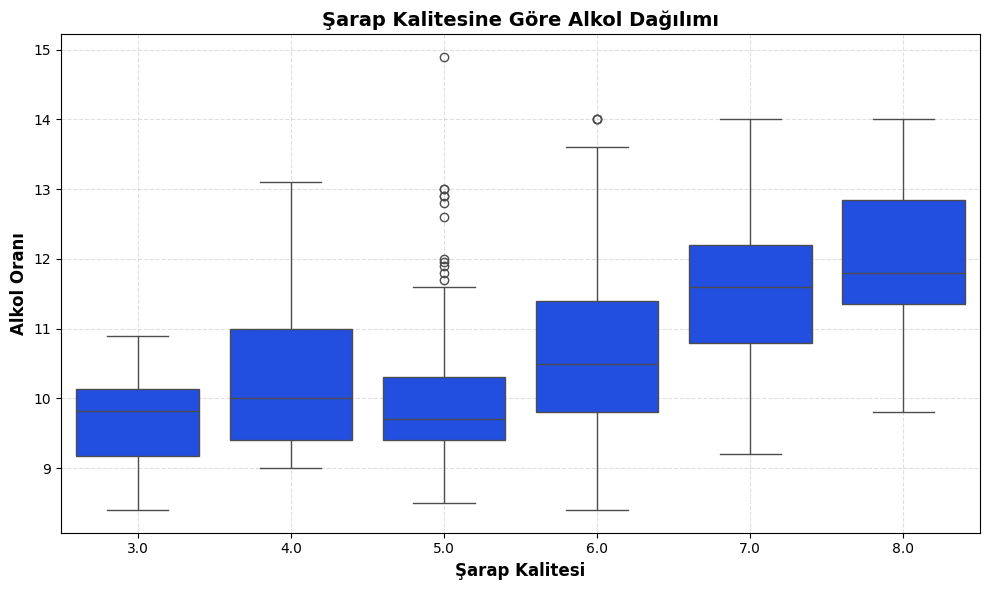

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x='kalite', y='alkol', data=p7wine)

plt.title("Şarap Kalitesine Göre Alkol Dağılımı", fontsize=14, fontweight="bold")
plt.xlabel("Şarap Kalitesi", fontweight="bold", fontsize=12)
plt.ylabel("Alkol Oranı", fontweight="bold", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Kalite 6 ve üzerindeki şaraplarda alkol oranı net şekilde yükseliyor özellikle 7 ve 8 kalite gruplarında bu artış daha belirgin

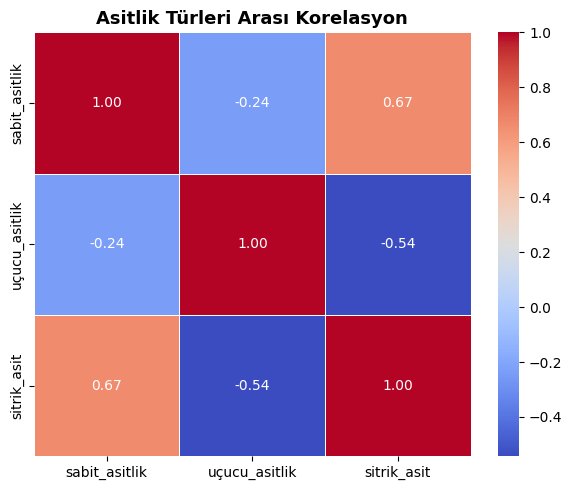

In [358]:
plt.figure(figsize=(6,5))
asitlik_sutunlari = ['sabit_asitlik', 'uçucu_asitlik', 'sitrik_asit']
kor = p7wine[asitlik_sutunlari].corr()

sns.heatmap(kor, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Asitlik Türleri Arası Korelasyon", fontweight="bold", fontsize=13)
plt.tight_layout()
plt.show()

Sabit asitlik ile sitrik asit arasında güçlü ve pozitif bir ilişki var yani biri arttıkça diğeri de artıyor. Yani genel olarak uçucu asitlik diğer asitliklerle ters gidiyor diyebiliriz.

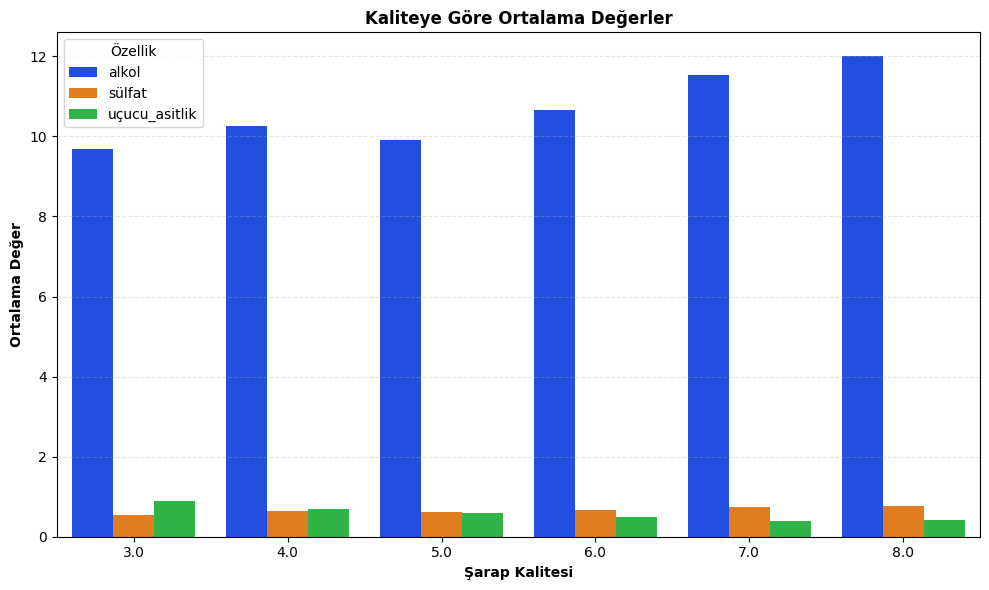

In [359]:
plt.figure(figsize=(10,6))
ortalama_df = (
    p7wine.groupby("kalite")[["alkol", "sülfat", "uçucu_asitlik"]]
    .mean()
    .reset_index()
    .melt(id_vars="kalite", var_name="özellik", value_name="ortalama_değer")
)

sns.barplot(data=ortalama_df, x="kalite", y="ortalama_değer", hue="özellik")

plt.title("Kaliteye Göre Ortalama Değerler", fontweight="bold")
plt.xlabel("Şarap Kalitesi", fontweight="bold")
plt.ylabel("Ortalama Değer", fontweight="bold")
plt.legend(title="Özellik")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

BU grafik kaliteli şarapların daha çok alkol barındırdığını gösteriyor. Sülfat ve uçucu asit şarap kalitesini önemli derecede etkileyen metrikler değilmiş.

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_16024/3967243205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=p7wine, x='kalite', y='ph', palette='Spectral')


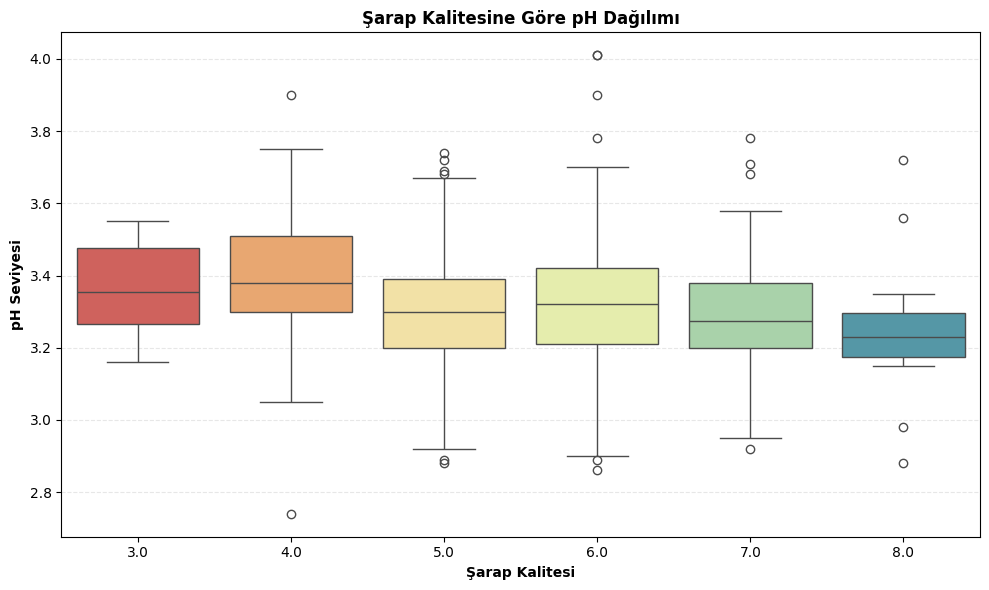

In [360]:
plt.figure(figsize=(10,6))
sns.boxplot(data=p7wine, x='kalite', y='ph', palette='Spectral')
plt.title("Şarap Kalitesine Göre pH Dağılımı", fontweight="bold")
plt.xlabel("Şarap Kalitesi", fontweight="bold")
plt.ylabel("pH Seviyesi", fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Bu grafikte ph seviyesi kalite arttıkça çok değişmiyor ama kalite 7 ve 8 olan şaraplarda dağılım daha dar. Bu da yüksek kaliteli şarapların ph seviyesi açısından daha dengeli olduğunu gösteriyor. Düşük kaliteli olanlarda ph daha kontrolsüz gibi.

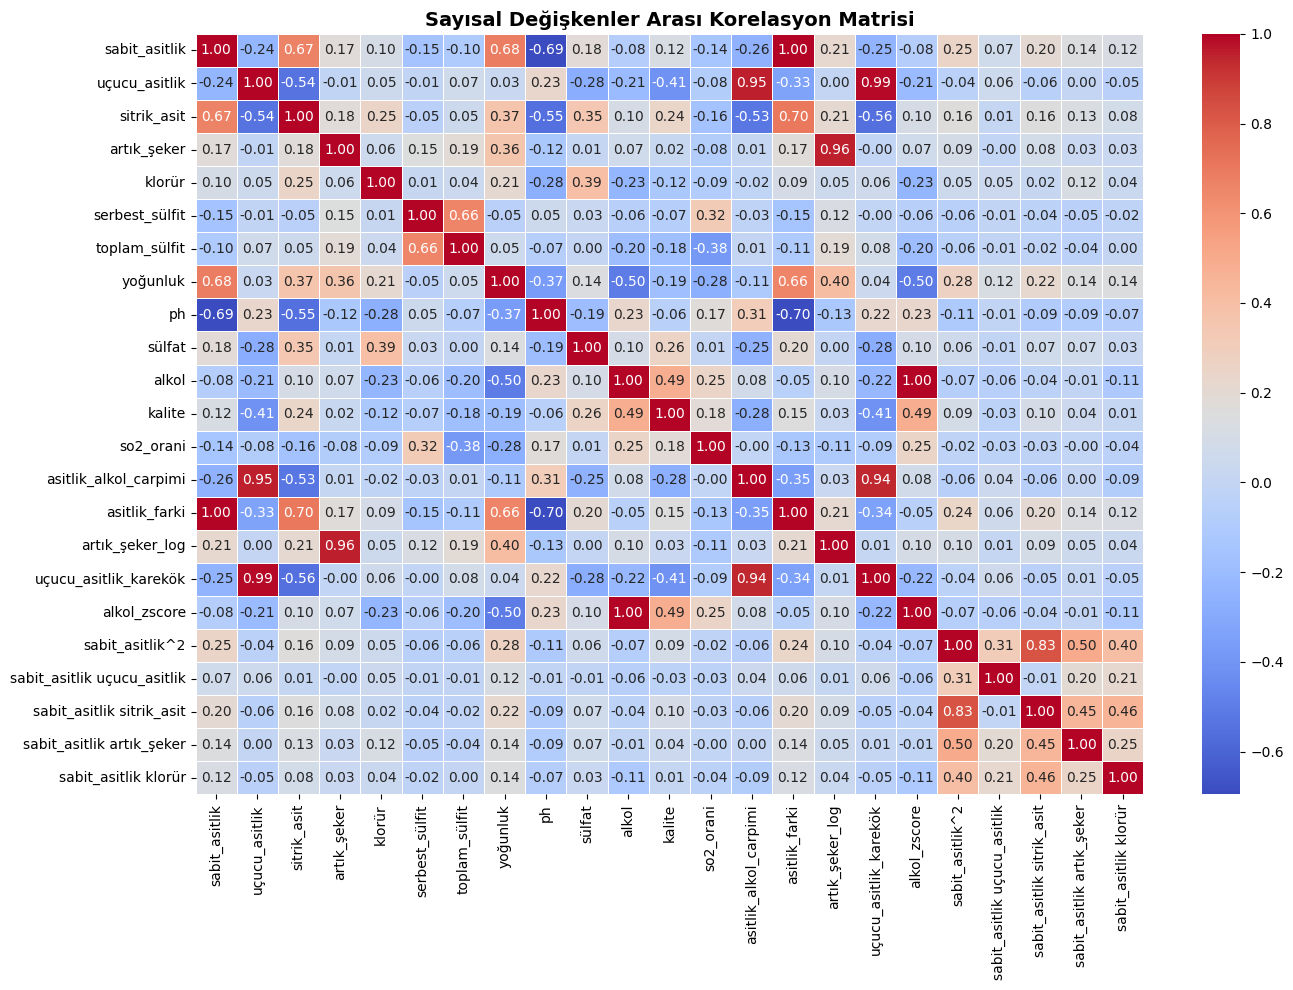

In [361]:
plt.figure(figsize=(14,10))
sayisal_sutunlar = p7wine.select_dtypes(include='number')
korelasyon = sayisal_sutunlar.corr()
sns.heatmap(korelasyon, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi", fontweight="bold", fontsize=14)
plt.tight_layout()
plt.show()

Alkol oranı arttıkça kalite de artıyor iki sütün arasında pozitif bir ilişki var. Uçucu asitlik ile kalite arasında negatif bir ilişki var yani uçucu asit arttıkça kalite düşüyor.

In [362]:
p7wine.isnull().sum()

sabit_asitlik                  116
uçucu_asitlik                  116
sitrik_asit                    116
artık_şeker                    116
klorür                         116
serbest_sülfit                 116
toplam_sülfit                  116
yoğunluk                       116
ph                             116
sülfat                         116
alkol                          116
kalite                         116
so2_orani                      116
asitlik_alkol_carpimi          116
asitlik_farki                  116
artık_şeker_log                116
uçucu_asitlik_karekök          116
alkol_zscore                   116
sabit_asitlik^2                116
sabit_asitlik uçucu_asitlik    116
sabit_asitlik sitrik_asit      116
sabit_asitlik artık_şeker      116
sabit_asitlik klorür           116
dtype: int64

In [363]:
# NaN içeren satırları temizle
p7wine = p7wine.dropna(subset=['kalite'])

MODELLEME

In [364]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = p7wine.drop(columns=['kalite'])
y = p7wine['kalite']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  0.5593
MSE:  0.5230
RMSE: 0.7232
R²:   0.3918


Random forest modelimiz mükemmel değil maalesef. Orta seviyede bir başarı.